In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as ah
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [6]:
data=pd.read_csv("/content/pluie.csv", sep=',', encoding="windows-1252")
data

,Ville,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
0,Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
1,Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
2,Angouleme,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
3,Besancon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
4,Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest
5,Bordeaux,100.0,84.0,66.0,57.0,64.0,71.0,52.0,65.0,88.0,84.0,99.0,117.0,947.0,16.0,13.0,13.0,13.0,14.0,11.0,11.0,12.0,13.0,14.0,15.0,17.0,162.0,13.33,15.4,2076.0,44.50,-0.34,26.6,31.3,Ouest
6,Brest,130.0,98.0,89.0,77.0,74.0,60.0,51.0,80.0,95.0,108.0,136.0,159.0,1157.0,22.0,16.0,15.0,15.0,14.0,13.0,14.0,15.0,16.0,19.0,20.0,22.0,201.0,10.77,10.2,1757.0,48.24,-4.29,22.9,28.2,Ouest
7,Caen,65.0,61.0,45.0,44.0,53.0,52.0,45.0,57.0,66.0,75.0,79.0,71.0,713.0,17.0,14.0,12.0,13.0,14.0,12.0,13.0,13.0,13.0,15.0,16.0,17.0,169.0,10.45,12.7,1777.0,49.11,-0.21,29.0,35.6,Nord
8,Clermont-Fd,28.0,27.0,30.0,41.0,78.0,79.0,48.0,70.0,58.0,43.0,39.0,30.0,571.0,12.0,11.0,9.0,12.0,12.0,12.0,9.0,10.0,10.0,11.0,12.0,12.0,132.0,10.94,16.8,1899.0,45.47,3.05,48.2,51.3,Est
9,Dijon,62.0,48.0,51.0,48.0,68.0,79.0,44.0,79.0,74.0,53.0,67.0,61.0,734.0,16.0,13.0,10.0,11.0,12.0,12.0,11.0,11.0,11.0,12.0,14.0,14.0,147.0,10.50,18.3,1934.0,47.19,5.01,36.8,37.1,Est


In [7]:
data.isnull().sum()

Ville                                  0
JANVIERp                               0
FEVRIERp                               0
MARSp                                  0
AVRILp                                 0
MAIp                                   0
JUINp                                  0
JUILLETp                               0
AOUTp                                  0
SEPTEMBREp                             0
OCTOBREp                               0
NOVEMBREp                              0
DECEMBREp                              0
Précipitations annuelles               0
JANVIERnb.j.pl                         0
FEVRIERnb.j.pl                         0
MARSnb.j.pl                            0
AVRILnb.j.pl                           0
MAInb.j.pl                             0
JUINnb.j.pl                            0
JUILLETnb.j.pl                         0
AOUTnb.j.pl                            0
SEPTEMBREnb.j.pl                       0
OCTOBREnb.j.pl                         0
NOVEMBREnb.j.pl 

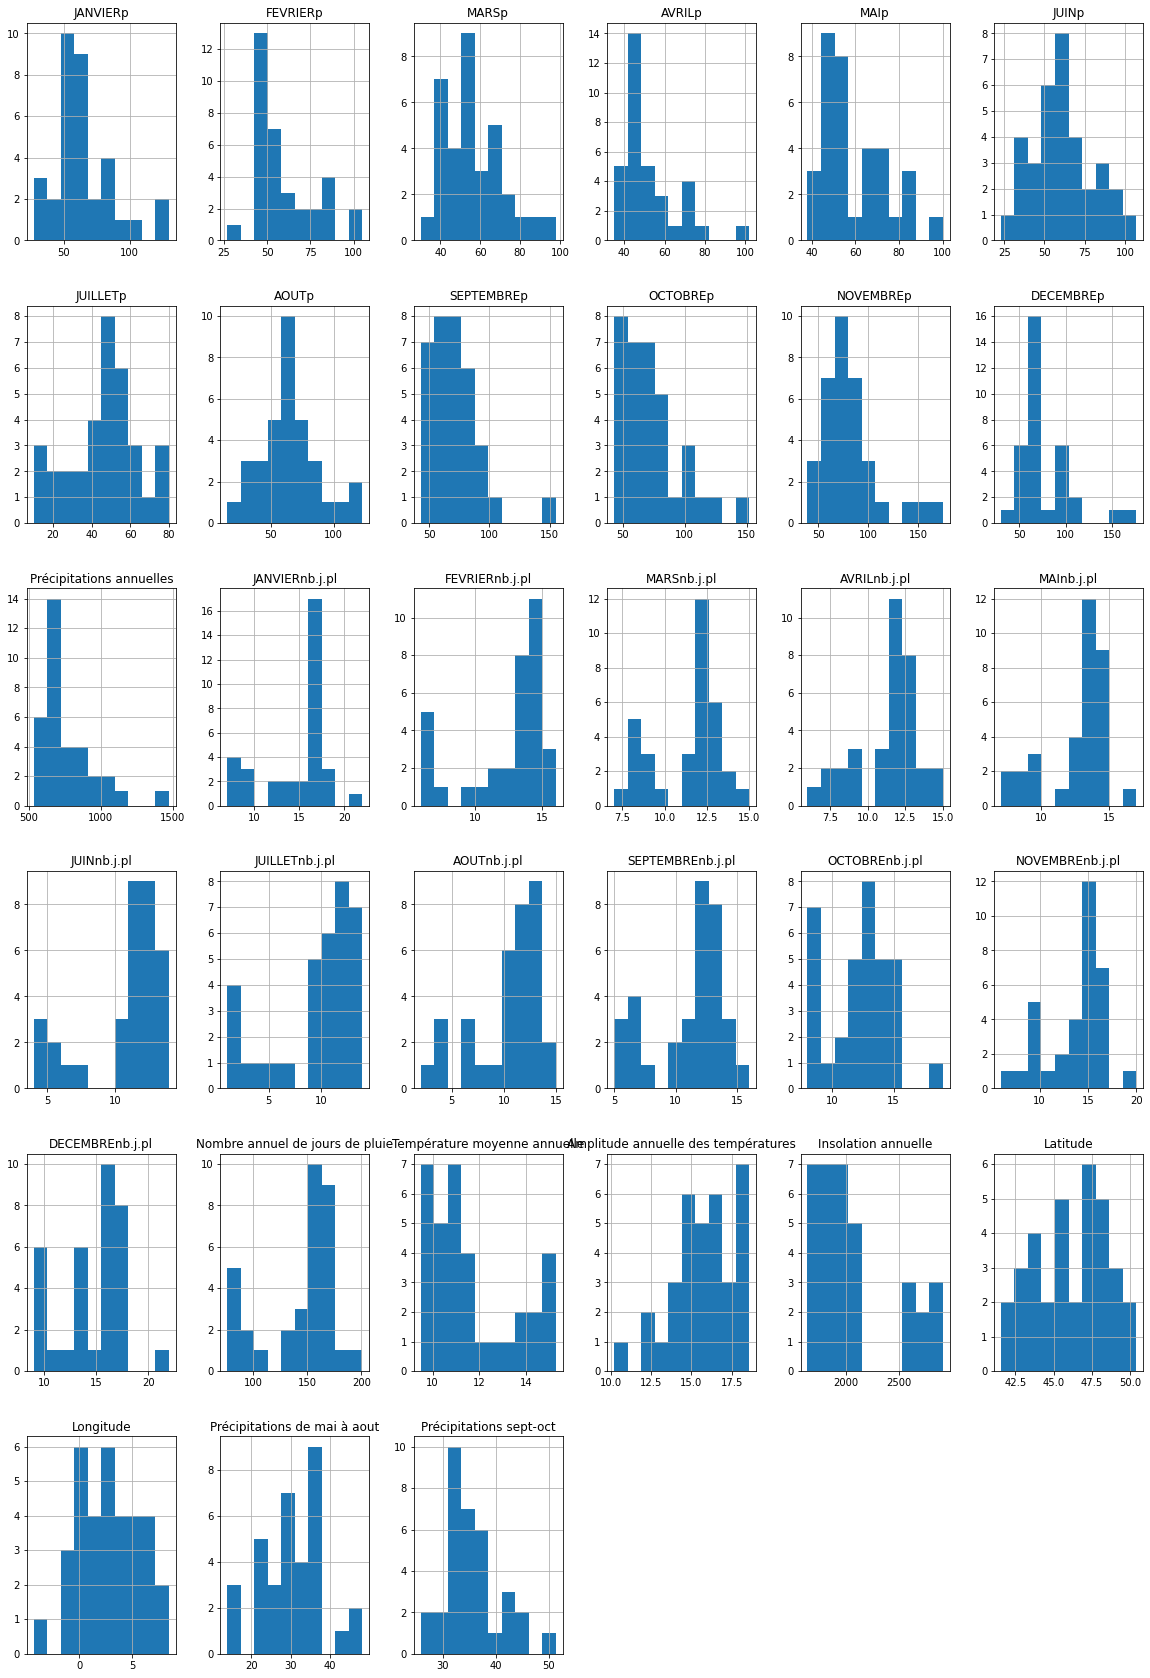

In [8]:
#Hstogrammes
data.hist(figsize=(20,30))
plt.show()

In [9]:
#Outliers Treatment
def remove_outlier (x) :
  qr1 = np.percentile(data[x],25)
  qr3 = np.percentile(data[x],75)
  iqr = qr3 - qr1 
  cutoff = iqr*1.5
  lower = qr1 - cutoff
  upper = qr3 + cutoff
  return (lower, upper)

lw, up = remove_outlier("FEVRIERp")
lw1, up1 = remove_outlier("AVRILp")
lw2, up2 = remove_outlier("SEPTEMBREp")
lw3, up3 = remove_outlier("OCTOBREp")
lw4, up4 = remove_outlier("DECEMBREp")
lw5, up5 = remove_outlier("Précipitations annuelles")
lw6, up6 = remove_outlier("OCTOBREnb.j.pl")
lw7, up7 = remove_outlier("NOVEMBREnb.j.pl")
lw8, up8 = remove_outlier("DECEMBREnb.j.pl")

data = data[(data["FEVRIERp"]>=lw) & (data["FEVRIERp"]<=up)]
data = data[(data["AVRILp"]>=lw1) & (data["AVRILp"]<=up1)]
data = data[(data["SEPTEMBREp"]>=lw2) & (data["SEPTEMBREp"]<=up2)]
data = data[(data["OCTOBREp"]>=lw3) & (data["OCTOBREp"]<=up3)]
data = data[(data["DECEMBREp"]>=lw4) & (data["DECEMBREp"]<=up4)]
data = data[(data["Précipitations annuelles"]>=lw5) & (data["Précipitations annuelles"]<=up5)]
data = data[(data["OCTOBREnb.j.pl"]>=lw6) & (data["OCTOBREnb.j.pl"]<=up6)]
data = data[(data["NOVEMBREnb.j.pl"]>=lw7) & (data["NOVEMBREnb.j.pl"]<=up7)]
data = data[(data["DECEMBREnb.j.pl"]>=lw8) & (data["DECEMBREnb.j.pl"]<=up8)]



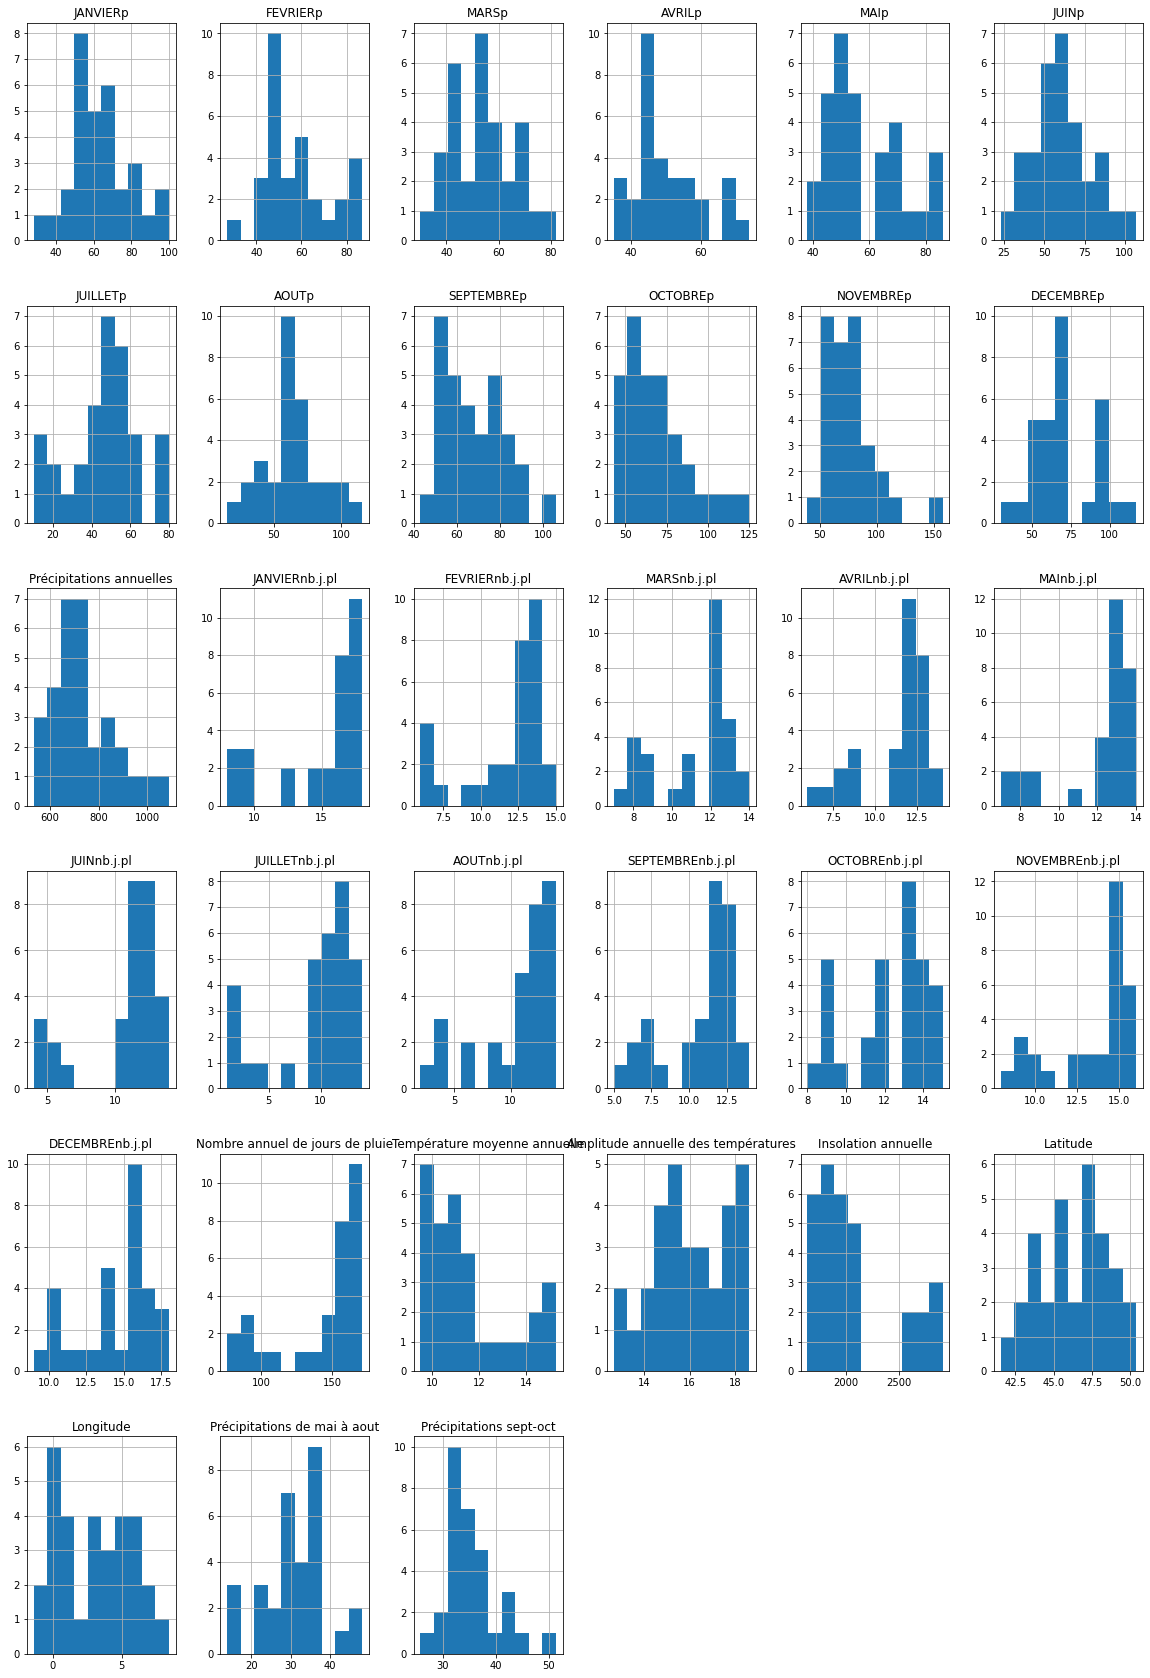

In [10]:
#New Histogrammes
data.hist(figsize=(20,30))
plt.show()

In [11]:
data.drop('Ville', axis=1, inplace=True)

In [12]:
data.columns

Index(['JANVIERp', 'FEVRIERp', 'MARSp', 'AVRILp', 'MAIp', 'JUINp', 'JUILLETp',
       'AOUTp', 'SEPTEMBREp', 'OCTOBREp', 'NOVEMBREp', 'DECEMBREp',
       'Précipitations annuelles', 'JANVIERnb.j.pl', 'FEVRIERnb.j.pl',
       'MARSnb.j.pl', 'AVRILnb.j.pl', 'MAInb.j.pl', 'JUINnb.j.pl',
       'JUILLETnb.j.pl', 'AOUTnb.j.pl', 'SEPTEMBREnb.j.pl', 'OCTOBREnb.j.pl',
       'NOVEMBREnb.j.pl', 'DECEMBREnb.j.pl', 'Nombre annuel de jours de pluie',
       'Température moyenne annuelle', 'Amplitude annuelle des températures',
       'Insolation annuelle', 'Latitude', 'Longitude',
       'Précipitations de mai à aout', 'Précipitations sept-oct',
       'Géographie'],
      dtype='object')

In [13]:
data['Géographie']=data['Géographie'].map({'Sud':1,'Nord':2,'Est':3, 'Ouest':4})

In [14]:
#DATA SCALING
from sklearn.preprocessing import StandardScaler
X = data[["JANVIERp","FEVRIERp","MARSp","AVRILp","MAIp","JUINp","JUILLETp","AOUTp","SEPTEMBREp","OCTOBREp","NOVEMBREp","DECEMBREp","Précipitations annuelles","JANVIERnb.j.pl","FEVRIERnb.j.pl","MARSnb.j.pl","AVRILnb.j.pl","MAInb.j.pl","JUINnb.j.pl","JUILLETnb.j.pl","AOUTnb.j.pl","SEPTEMBREnb.j.pl","OCTOBREnb.j.pl","NOVEMBREnb.j.pl","DECEMBREnb.j.pl","Nombre annuel de jours de pluie","Température moyenne annuelle","Amplitude annuelle des températures","Insolation annuelle","Latitude","Longitude","Précipitations de mai à aout","Précipitations sept-oct","Géographie"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#PCA
pca = PCA(n_components=6)
data_pca = pca.fit_transform(X_scaled)
dfn = pd.DataFrame(data_pca ,  columns=['pca1' , 'pca2','pca3','pca4','pca5','pca6'])
dfn

,pca1,pca2,pca3,pca4,pca5,pca6
0,7.782757,-0.322810,-3.249026,2.598683,0.589182,1.185263
1,-1.315292,-0.249183,-2.344257,-0.187723,0.735346,-0.939785
2,-1.815426,2.643901,-1.136904,-0.157960,1.462231,0.004936
3,-3.646852,6.220965,3.666387,0.472724,-1.050933,0.329822
4,-1.351621,5.160406,-1.485363,-0.688468,0.866198,0.061028
5,-2.763002,-0.136378,-2.583020,-0.865296,-1.378827,0.910985
6,-0.778935,-5.080301,3.648669,-1.601266,1.420935,1.099220
7,-1.241334,-0.731626,2.064123,0.461346,0.019352,-0.571271
8,3.842246,-1.420105,2.157275,2.075787,-0.251824,-1.260979
9,-0.694701,4.541952,3.447620,0.553805,0.277706,-0.060423


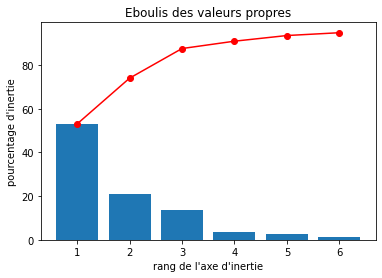

In [16]:
#PCA explained variance criterion
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)

In [17]:
new_data = dfn [['pca1','pca2','pca3','pca4']]

In [18]:
#Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4 , affinity='euclidean' ,linkage='complete')
label = model.fit_predict(new_data)
predicted_df = pd.DataFrame(label)

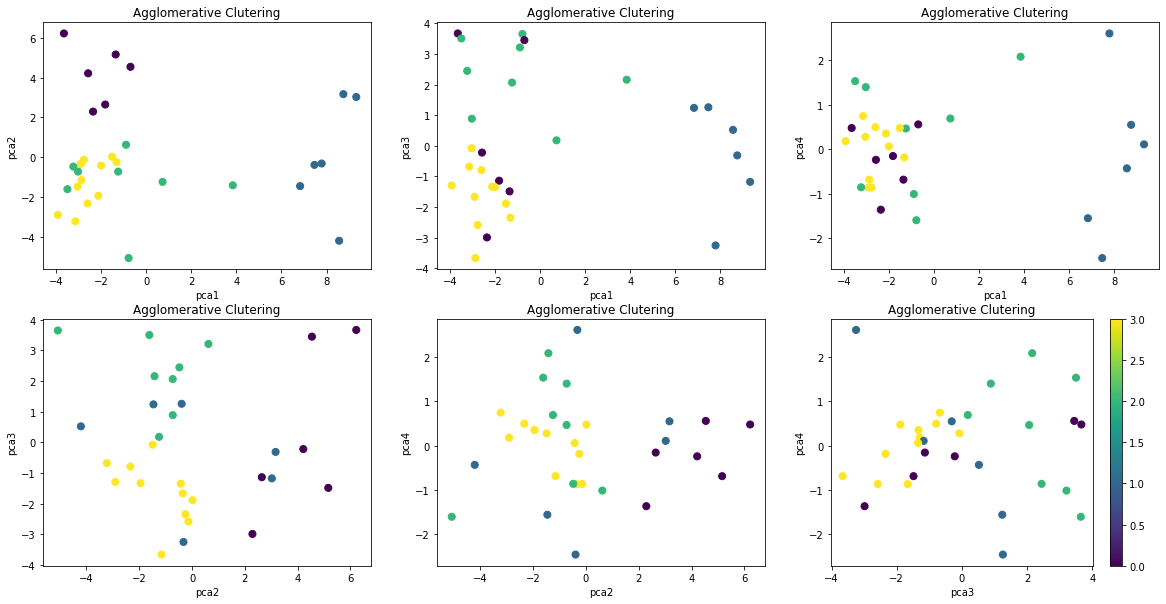

In [19]:
fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(231)
scatter = ax.scatter (new_data ['pca1'] , new_data ["pca2"] , c= predicted_df[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
bx = fig.add_subplot(232)
scatter = bx.scatter (new_data ['pca1'] , new_data ["pca3"] , c= predicted_df[0], s=50)
bx.set_title("Agglomerative Clutering")
bx.set_xlabel("pca1")
bx.set_ylabel("pca3")
cx = fig.add_subplot(233)
scatter = cx.scatter (new_data ['pca1'] , new_data ["pca4"] , c= predicted_df[0], s=50)
cx.set_title("Agglomerative Clutering")
cx.set_xlabel("pca1")
cx.set_ylabel("pca4")
dx = fig.add_subplot(234)
scatter = dx.scatter (new_data ['pca2'] , new_data ["pca3"] , c= predicted_df[0], s=50)
dx.set_title("Agglomerative Clutering")
dx.set_xlabel("pca2")
dx.set_ylabel("pca3")
ex = fig.add_subplot(235)
scatter = ex.scatter (new_data ['pca2'] , new_data ["pca4"] , c= predicted_df[0], s=50)
ex.set_title("Agglomerative Clutering")
ex.set_xlabel("pca2")
ex.set_ylabel("pca4")
fx = fig.add_subplot(236)
scatter = fx.scatter (new_data ['pca3'] , new_data ["pca4"] , c= predicted_df[0], s=50)
fx.set_title("Agglomerative Clutering")
fx.set_xlabel("pca3")
fx.set_ylabel("pca4")
plt.colorbar(scatter)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


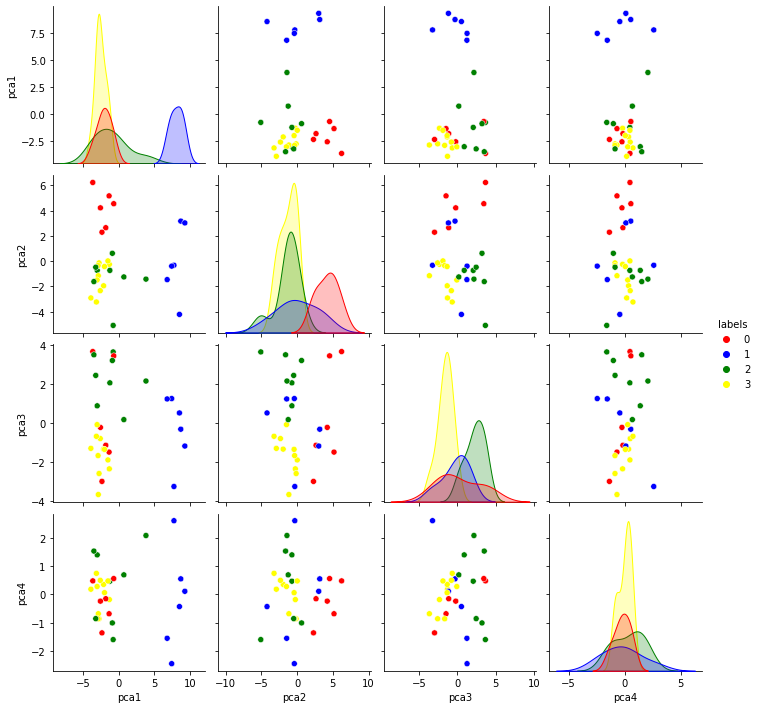

In [20]:
dftest = new_data
dftest['labels']=predicted_df[0]

sns.pairplot(dftest, hue='labels', palette=['red','blue','green','yellow'])

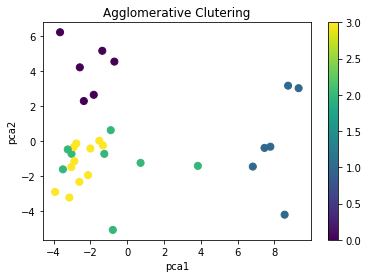

In [21]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_data ['pca1'] , new_data ["pca2"] , c= predicted_df[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
plt.colorbar(scatter)
plt.show()

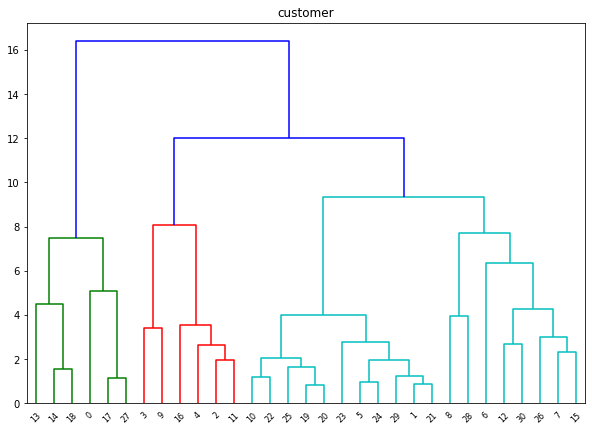

In [22]:
plt.figure( figsize=(10,7))
plt.title('customer')
dend = ah.dendrogram(ah.linkage(new_data , method='complete'))
plt.show()

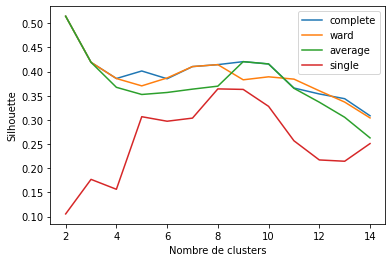

In [23]:
sum_err_2_5 = []
sum_err_2_6 = []
sum_err_2_7 = []
sum_err_2_8 = []
link = ["complete","ward","average","single"]
for l in link : 
  for i in range(2,15) :
    sil= AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=l)
    sil.fit(new_data)
    
    if (l=="complete"):
      sum_err_2_5.append(metrics.silhouette_score(new_data, sil.labels_, metric='euclidean'))
    elif (l=="ward"):
      sum_err_2_6.append(metrics.silhouette_score(new_data, sil.labels_, metric='euclidean'))
    elif (l=="average"):
      sum_err_2_7.append(metrics.silhouette_score(new_data, sil.labels_, metric='euclidean'))
    elif (l=="single"):
      sum_err_2_8.append(metrics.silhouette_score(new_data, sil.labels_, metric='euclidean'))

plt.plot(range(2,15), sum_err_2_5, label=link[0])
plt.plot(range(2,15), sum_err_2_6, label=link[1])
plt.plot(range(2,15), sum_err_2_7, label=link[2])
plt.plot(range(2,15), sum_err_2_8, label=link[3])
plt.legend()
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette")
plt.show()

In [24]:
#K-MEANS CLUSTERING
model_k = KMeans(n_clusters=4)
model_k.fit(new_data)
predicted_df = pd.DataFrame(model_k.labels_)
Clus_Cent_ = model_k.cluster_centers_
new_data['label'] = predicted_df


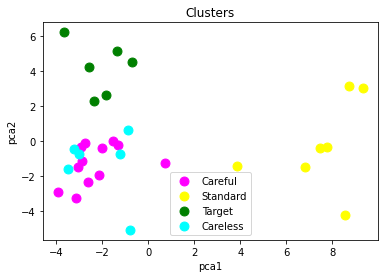

In [25]:
plt.scatter(new_data["pca1"][new_data.label == 0],          
            new_data["pca2"][new_data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(new_data["pca1"][new_data.label == 1],
           new_data["pca2"][new_data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(new_data["pca1"][new_data.label == 2],
           new_data["pca2"][new_data.label == 2],s=80,c='green',label='Target')
plt.scatter(new_data["pca1"][new_data.label == 3], 
           new_data["pca2"][new_data.label == 3],s=80,c='cyan',label='Careless')
#plt.scatter(new_data["pca1"][data.label == 4], 
           #new_data["pca2"][data.label == 4],s=80,c='burlywood',label='Sensible')
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

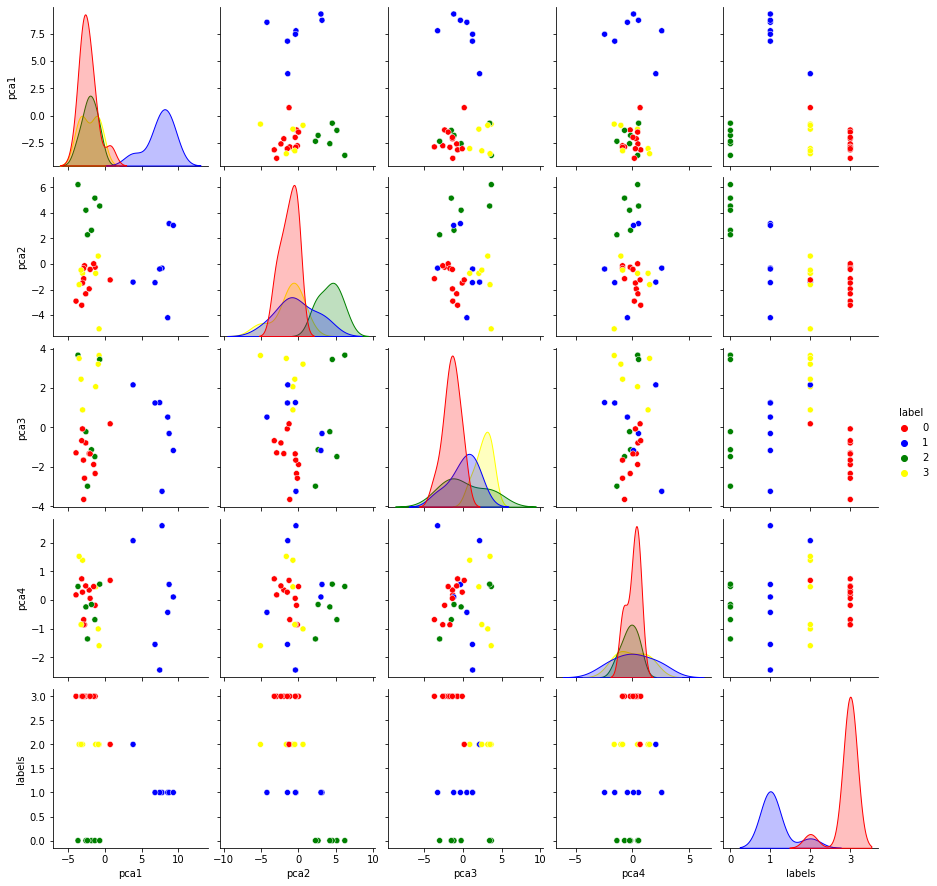

In [26]:
sns.pairplot(new_data, hue='label', palette=['red','blue','green','yellow'])

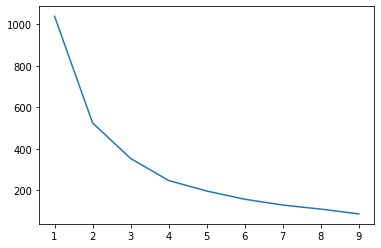

In [27]:
model_k.inertia_
sum_err = []
for k in range(1,10) :
  km=KMeans(n_clusters=k)
  km.fit(new_data)
  sum_err.append(km.inertia_)
plt.plot(range(1,10),sum_err)
plt.show()

In [28]:
from sklearn.neighbors import NearestNeighbors

Text(0, 0.5, 'Average distance of 4 nearest neighbord sorted')

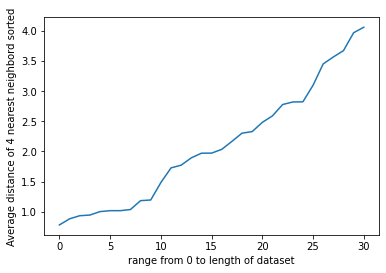

In [29]:
newDistances = []
NNModel = NearestNeighbors(n_neighbors=4)
nombre = NNModel.fit(new_data)
distances, indices = nombre.kneighbors(new_data)
for i in range(len(distances)):
  newDistances.append(distances[i].mean())
newDistances.sort()
plt.plot(range(0, len(newDistances)), newDistances)
plt.xlabel("range from 0 to length of dataset")
plt.ylabel("Average distance of 4 nearest neighbord sorted")

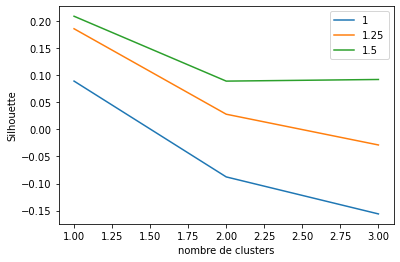

In [31]:
eps_range = [1, 1.25, 1.5]
min_pts_max_range = 4
tab_silh_0 = []
tab_silh_1 = []
tab_silh_2 = []
for j in eps_range:
    for i in range(1, min_pts_max_range):
        
        cl_pred = cluster.DBSCAN(eps=j, min_samples=i).fit_predict(new_data)
        if(j==1) : {tab_silh_0.append(metrics.silhouette_score(new_data, cl_pred, metric='euclidean'))}
        elif(j==1.25): {tab_silh_1.append(metrics.silhouette_score(new_data, cl_pred, metric='euclidean'))}
        elif(j==1.5): {tab_silh_2.append(metrics.silhouette_score(new_data, cl_pred, metric='euclidean'))}

plt.plot(range(1, min_pts_max_range), tab_silh_0, label =eps_range[0])
plt.plot(range(1, min_pts_max_range), tab_silh_1, label =eps_range[1])
plt.plot(range(1, min_pts_max_range), tab_silh_2, label =eps_range[2])
plt.xlabel("nombre de clusters")
plt.ylabel("Silhouette")
plt.legend()
plt.show()

In [32]:
model = cluster.DBSCAN(eps=1.5, min_samples=3)
pred = model.fit_predict(new_data)
test_data = new_data
test_data['pred']=pred

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


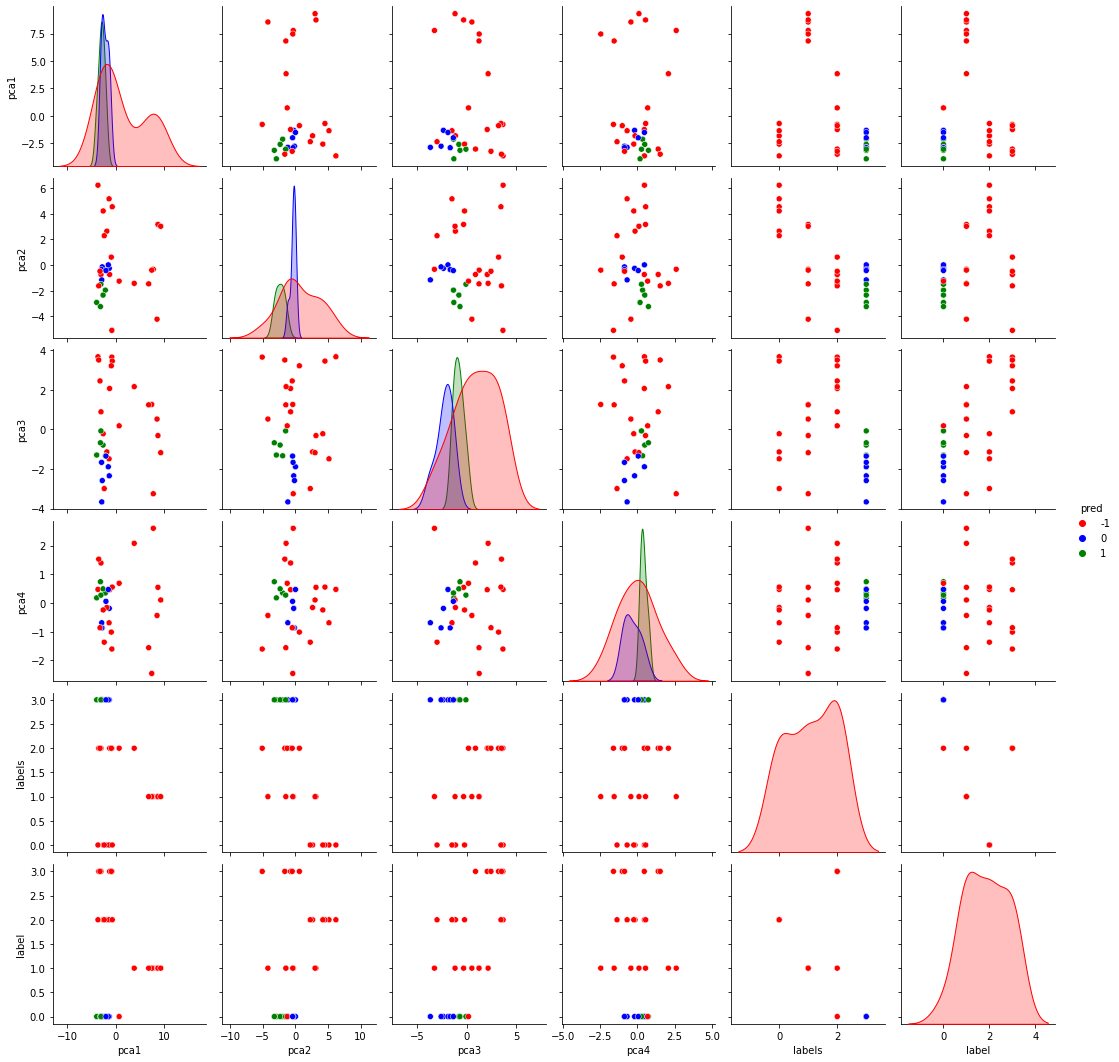

In [37]:
sns.pairplot(test_data, 'pred', palette=['red','blue','green'])

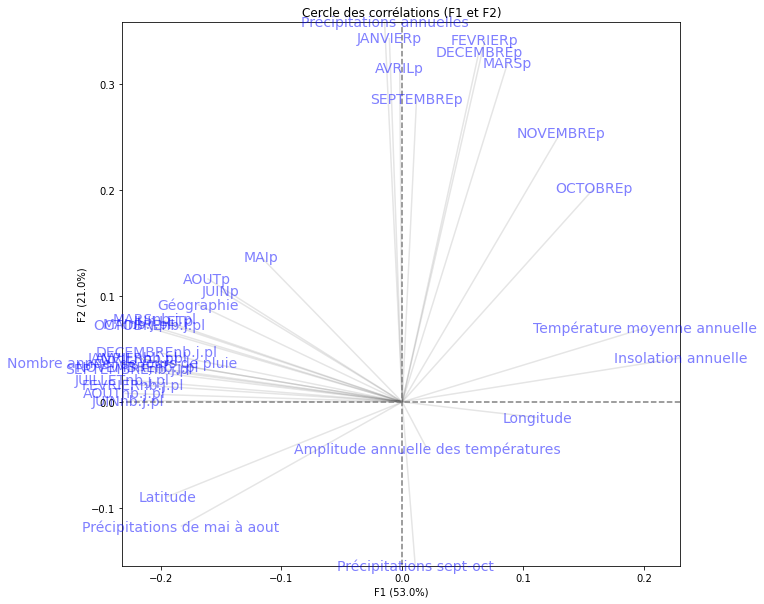

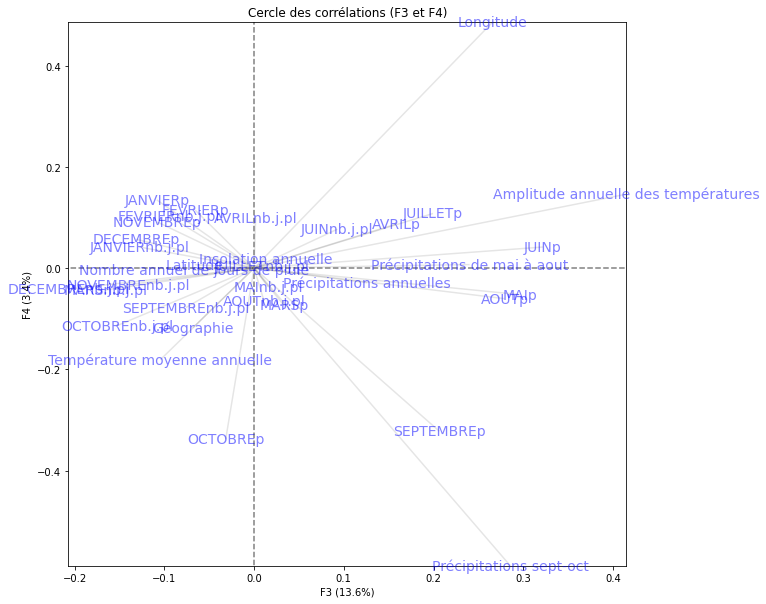

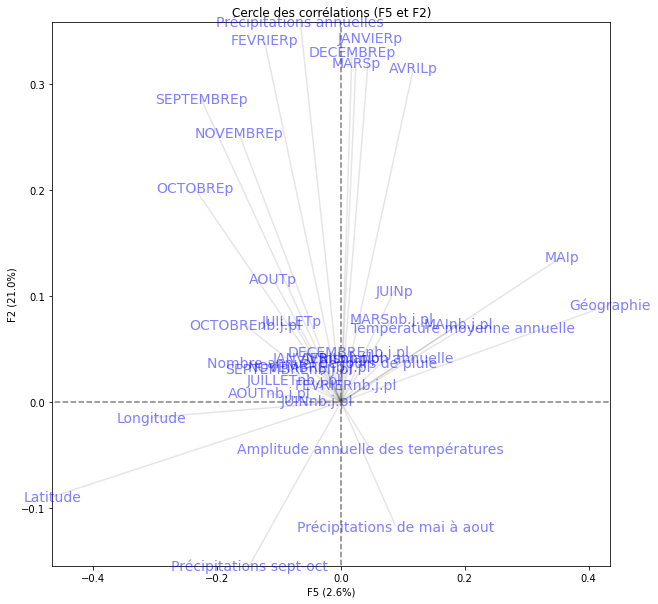

In [34]:
from matplotlib.collections import LineCollection
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:
            fig, ax = plt.subplots(figsize=(10,10))
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)        
         
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
               
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
col = ["JANVIERp","FEVRIERp","MARSp","AVRILp","MAIp","JUINp","JUILLETp","AOUTp","SEPTEMBREp","OCTOBREp","NOVEMBREp","DECEMBREp","Précipitations annuelles","JANVIERnb.j.pl","FEVRIERnb.j.pl","MARSnb.j.pl","AVRILnb.j.pl","MAInb.j.pl","JUINnb.j.pl","JUILLETnb.j.pl","AOUTnb.j.pl","SEPTEMBREnb.j.pl","OCTOBREnb.j.pl","NOVEMBREnb.j.pl","DECEMBREnb.j.pl","Nombre annuel de jours de pluie","Température moyenne annuelle","Amplitude annuelle des températures","Insolation annuelle","Latitude","Longitude","Précipitations de mai à aout","Précipitations sept-oct","Géographie"]
pcs = pca.components_
display_circles(pcs,6,pca, [(0,1),(2,3),(4, 1)] , labels= col)